<a href="https://colab.research.google.com/github/marsred/The_School_Of_AI/blob/master/2nd_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


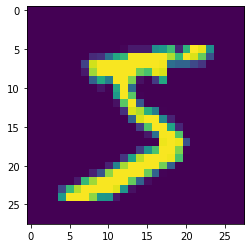

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [7]:
print (X_train.shape)
#print (X_train[:10])

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [112]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, activation='relu', use_bias=False)) # 22
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2)) # 11

model.add(Convolution2D(16, 1, activation='relu', use_bias=False)) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, activation='relu', use_bias=False)) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, activation='relu', use_bias=False)) # 5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5, use_bias=False)) # 1

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """


In [113]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_218 (Conv2D)          (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_167 (Bat (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_62 (Dropout)         (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 24, 24, 16)        1152      
_________________________________________________________________
batch_normalization_168 (Bat (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_63 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 22, 22, 32)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

In [115]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test), 
          callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 54s 895us/step - loss: 0.1684 - acc: 0.9477 - val_loss: 0.0576 - val_acc: 0.9803
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 41s 680us/step - loss: 0.0655 - acc: 0.9793 - val_loss: 0.0381 - val_acc: 0.9881
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 43s 716us/step - loss: 0.0556 - acc: 0.9828 - val_loss: 0.0323 - val_acc: 0.9900
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 41s 684us/step - loss: 0.0476 - acc: 0.9853 - val_loss: 0.0264 - val_acc: 0.9923
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [==

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [117]:
print(score)

[0.017546740827044414, 0.9945]


In [0]:
y_pred = model.predict(X_test)

In [119]:
print(y_pred[:9])
print(y_test[:9])

[[1.5624872e-12 7.5193329e-10 7.6953079e-08 1.2985343e-07 2.2549610e-12
  1.8332266e-10 1.8425815e-15 9.9999976e-01 4.4594695e-10 5.3213835e-08]
 [9.9466463e-11 1.0297893e-07 9.9999988e-01 4.9905130e-10 1.7487177e-09
  8.4500217e-14 2.9564232e-08 2.5600013e-08 8.8209509e-11 1.3966724e-12]
 [3.6617889e-10 9.9997950e-01 3.5466428e-07 2.1404735e-07 4.2494194e-06
  1.5938613e-07 2.0430326e-07 9.4840016e-06 1.9228773e-07 5.6513732e-06]
 [9.9984133e-01 2.0062970e-11 3.9112504e-07 4.2177963e-09 2.0792728e-09
  3.4295102e-08 1.5772851e-04 1.2086994e-10 1.1218389e-07 3.9112803e-07]
 [1.5671214e-10 2.3226589e-11 2.3285796e-12 1.1255127e-11 9.9999630e-01
  3.4957084e-10 4.5460324e-09 5.9834304e-11 2.1877069e-08 3.6487299e-06]
 [3.9817721e-10 9.9997437e-01 8.5182694e-07 1.2646404e-08 2.7987953e-06
  1.3504228e-08 5.4203046e-08 1.9765315e-05 1.4706626e-07 2.0132854e-06]
 [2.2095969e-14 8.0432976e-09 1.3240520e-10 6.7189041e-12 9.9999917e-01
  1.2885628e-08 5.9454369e-12 1.4642947e-07 3.5901016e-07 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

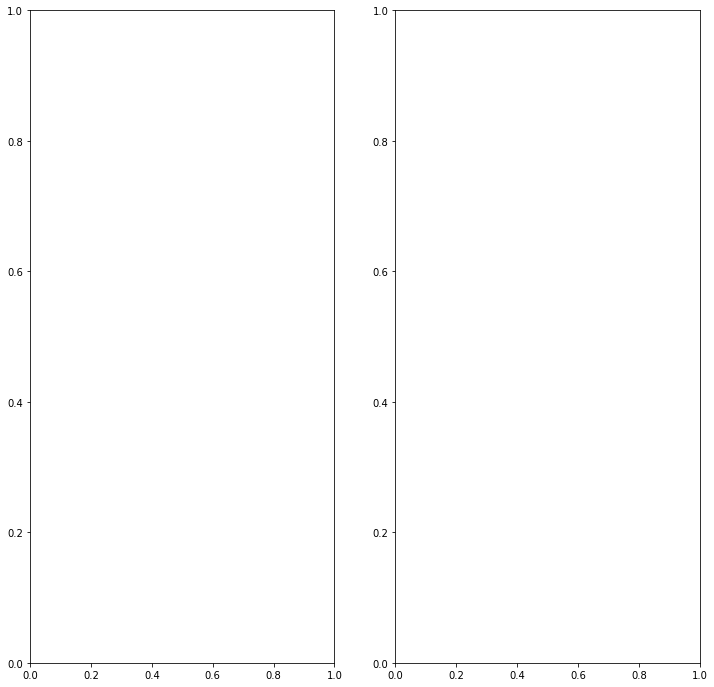

In [121]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_218'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()